In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data to pandas and check dtype

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission_df = pd.read_csv("gender_submission.csv")

print(train_df.dtypes, "\n")
print("Training dataset elements: ", train_df['PassengerId'].size)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Training dataset elements:  891


In [3]:
display(train_df.head())
display(test_df.head())
display(sample_submission_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
#Change dtypes for test_df and train_df

embarkation_mapping = {"C":"Cherbourg", "Q":"Queenstown", "S":"Southampton"}

for dataframe in [test_df, train_df]:
    dataframe['Sex'] = dataframe['Sex'].astype('category')
    dataframe['Pclass'] = dataframe['Pclass'].astype('category')
    dataframe['Embarked'] = dataframe['Embarked'].astype('category').map(embarkation_mapping)

train_df['Survived'] = train_df['Survived'].astype('bool')

print(train_df.dtypes)

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


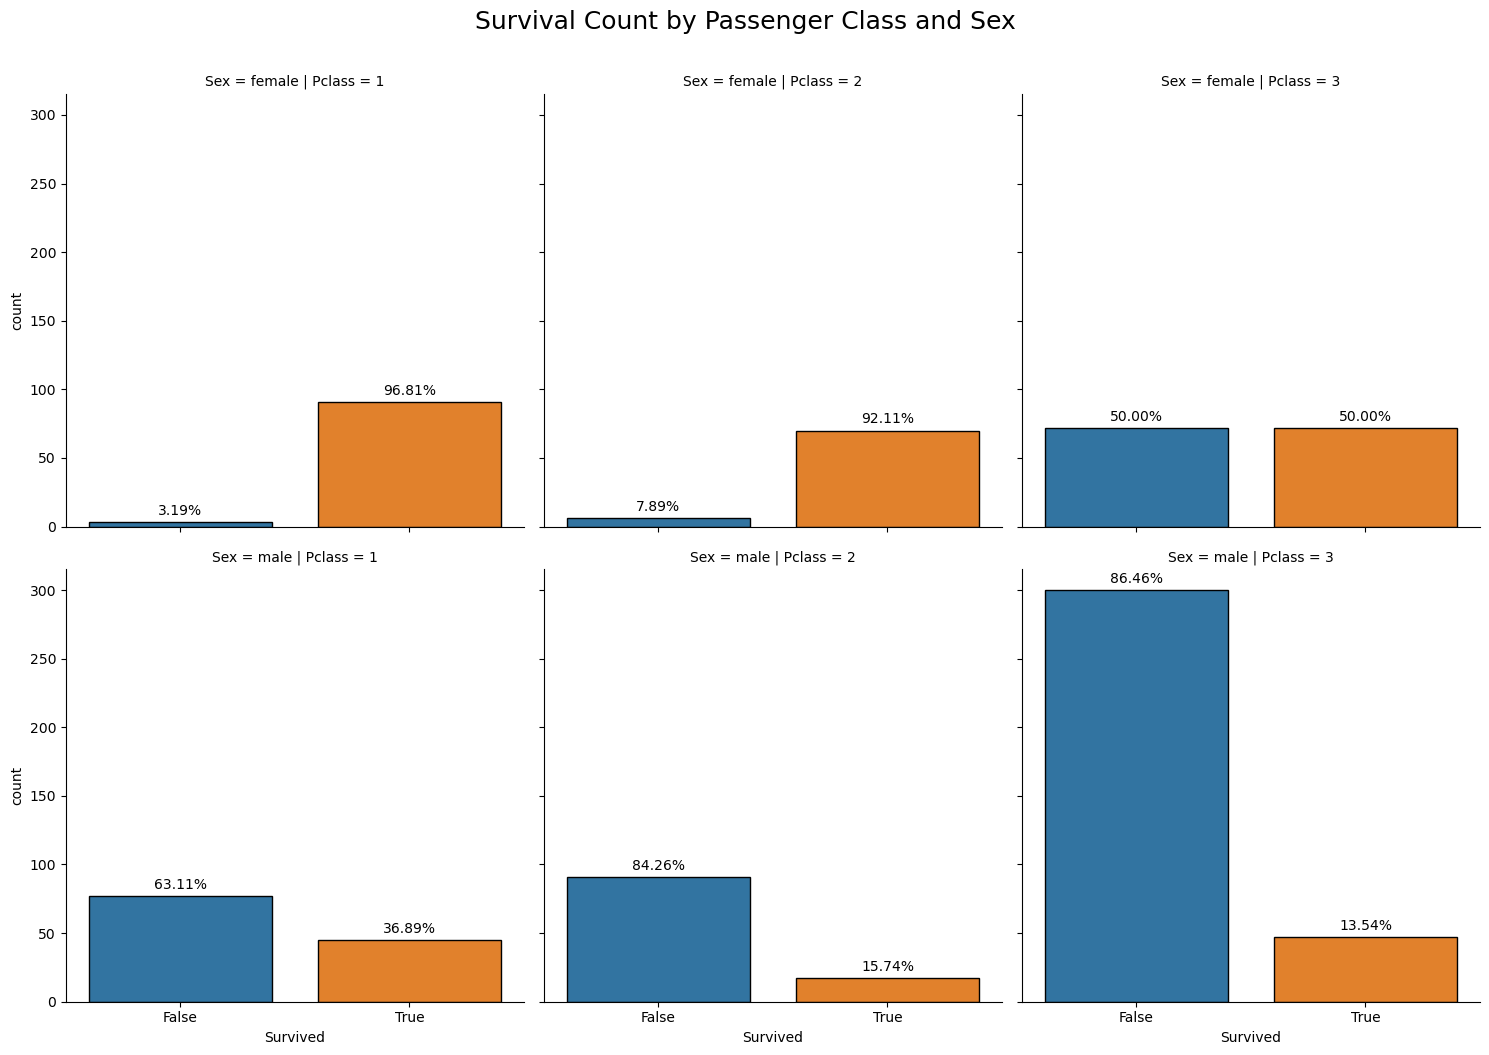

In [5]:
# Create catplot
fig1 = sns.catplot(
    data=train_df, x="Survived", kind="count", col='Pclass', row='Sex', errorbar=None
)

# Set the overall title
fig1.fig.suptitle("Survival Count by Passenger Class and Sex", fontsize=18, y=1.05)

# Add black borders to bars
for ax in fig1.axes.flat:
    for p in ax.patches:
        p.set_edgecolor('black')  # Add black border
        p.set_linewidth(1)  # Increase border thickness

    # Annotate bars with fraction values
    total = sum(p.get_height() for p in ax.patches)  # Get total count per subplot
    for p in ax.patches:
        fraction = p.get_height() / total  # Compute fraction
        ax.annotate(f"{fraction:.2%}",  # Convert to percentage format
                    (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

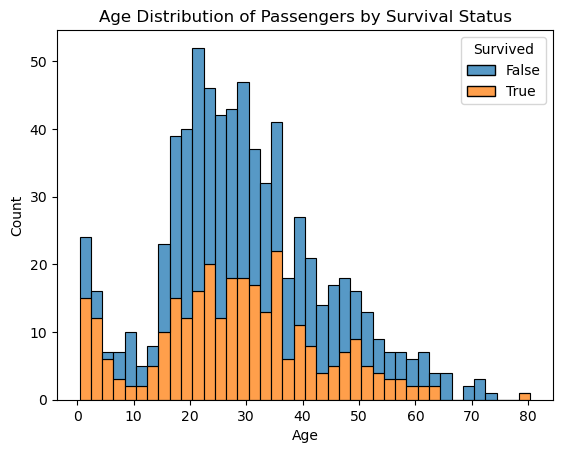

In [6]:
fig2 = sns.histplot(data=train_df, x='Age', binwidth=2, hue='Survived', multiple="stack")

# Set the overall title
# Set title correctly
plt.title("Age Distribution of Passengers by Survival Status", fontsize=12)

plt.show()

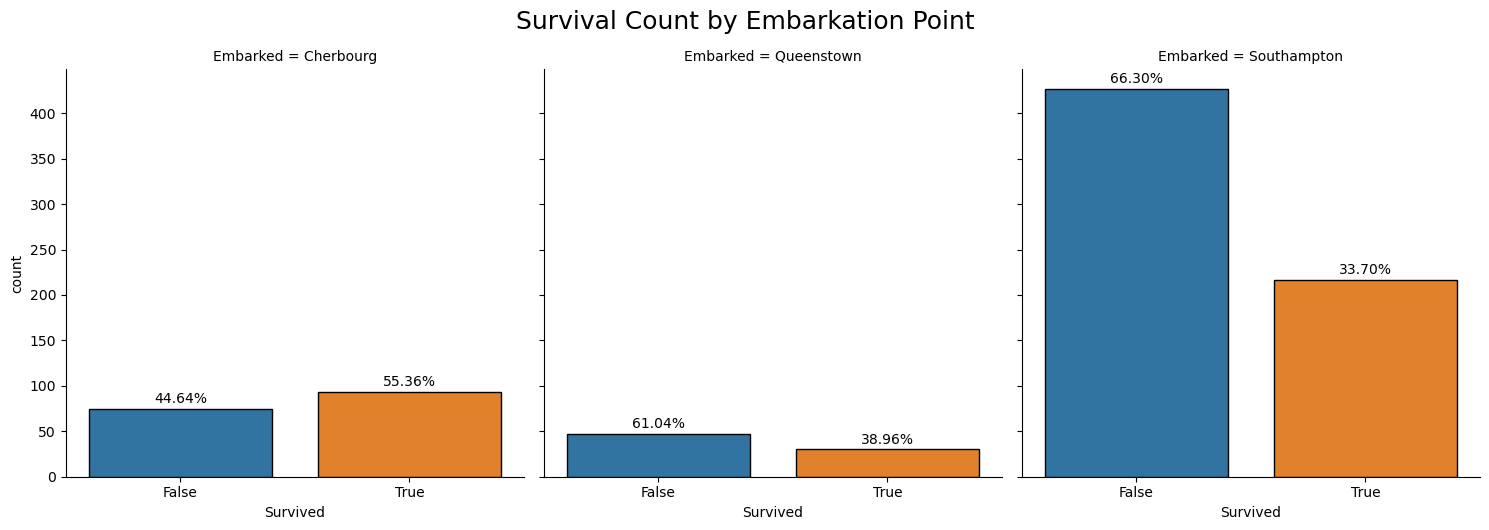

In [7]:
# Create catplot
fig1 = sns.catplot(
    data=train_df, x="Survived", kind="count", col='Embarked', errorbar=None
)

# Set the overall title
fig1.fig.suptitle("Survival Count by Embarkation Point", fontsize=18, y=1.05)

# Add black borders to bars
for ax in fig1.axes.flat:
    for p in ax.patches:
        p.set_edgecolor('black')  # Add black border
        p.set_linewidth(1)  # Increase border thickness

    # Annotate bars with fraction values
    total = sum(p.get_height() for p in ax.patches)  # Get total count per subplot
    for p in ax.patches:
        fraction = p.get_height() / total  # Compute fraction
        ax.annotate(f"{fraction:.2%}",  # Convert to percentage format
                    (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()